In [1]:
import IPython.display as ipd # let's you display audio
import numpy as np
import librosa
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Image
import sklearn

### Loading an audio file

In [22]:
audio_path = 'media/tone_220.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(110250,) 22050


This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono.

We can change this behaviour by saying:

In [23]:
x, sr = librosa.load(audio_path, sr=44100)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(220500,) 44100


In [24]:
x, sr = librosa.load(audio_path, sr=None)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(110250,) 22050


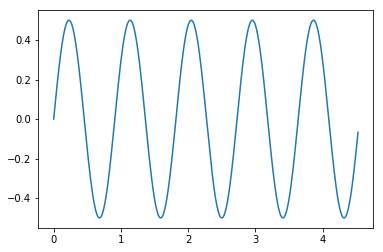

In [25]:
#time variable
t = np.linspace(0,1000,len(x))
sns.lineplot(x = t[0:500],y = x[0:500])

it's a sine wave!

### Playing audio

In [26]:
ipd.Audio(audio_path)

### Creating an audio signal

In [27]:
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
librosa.output.write_wav('tone_220.wav', x, sr)

### Visualizing and audio signal

#### Amplitude envelop

<Figure size 1008x360 with 0 Axes>

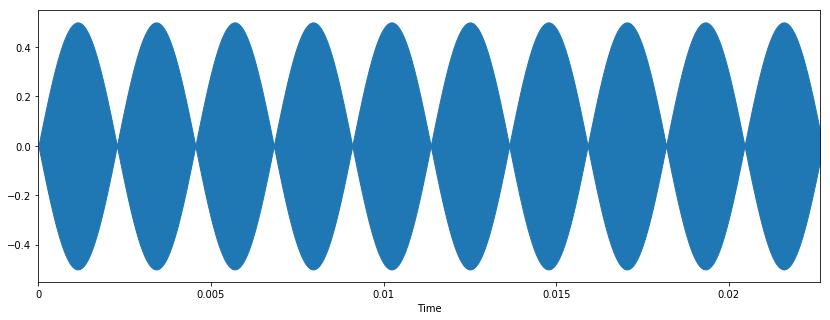

In [28]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x[:500], sr=sr)

#### Spectogram

plots the frequencies in action over time

<Figure size 1008x360 with 0 Axes>

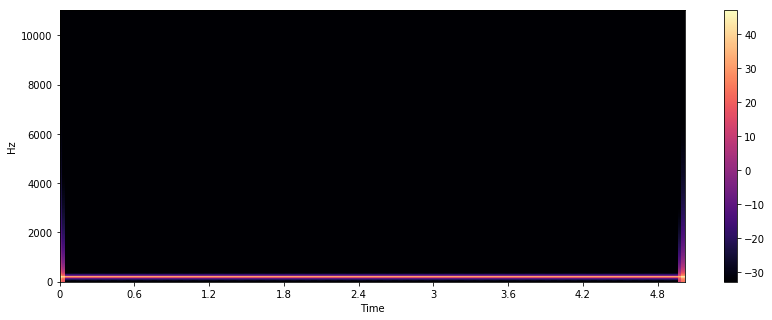

In [29]:
%matplotlib inline
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Feature Extraction

#### Zero crossing rate

- The zero crossing rate is the rate of sign-changes along a signal

- This feature is used heavily in both speech recognition and music information retrieval.

- It usually has higher values for highly percussive sounds like those in metal and rock.

<Figure size 1008x360 with 0 Axes>

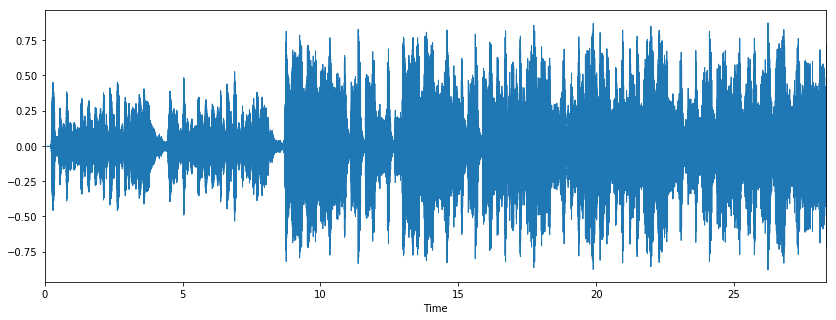

In [30]:
# Load the signal
x, sr = librosa.load('media/violin_music.mp3')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

<Figure size 1008x360 with 0 Axes>

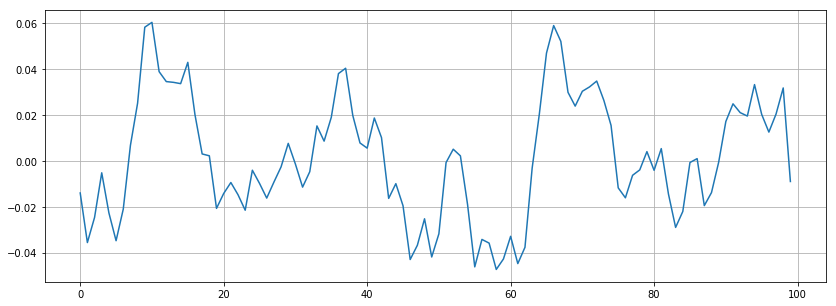

In [31]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

There appears to be 18 crossings, let's verify with librosa

In [32]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

18


![](media/memes/wasRight.jpg)

Let's make a function that extracts this feature

In [33]:
def extract_zero_crossing_rate(x, sr):
    """
    inputs
    --------------------------
    x    : np.ndarray [shape=(n,)]
    audio time series

    sr   : number > 0 [scalar]
    sampling rate of `x`
    
    outputs
    --------------------------
    y    : int
    zero crossing rate normalized by length of the clip
    """

    zero_crossings = librosa.zero_crossings(x, pad=False)
    #normalize by time span
    duration = librosa.core.get_duration(x,sr)
    zero_crossings = sum(zero_crossings) / duration
    return zero_crossings


audio_path = 'media/violin_music.mp3'
x , sr = librosa.load(audio_path)
extract_zero_crossing_rate(x,sr)

2151.5826612903224

#### Spectral Centroid

- It indicates where the "center of mass" of sound is located

- It is calculated as the weighted mean of the frequencies present in the sound

In [34]:
spectral_centroids.shape
x.shape

(1221,)

(624960,)

(1221,)

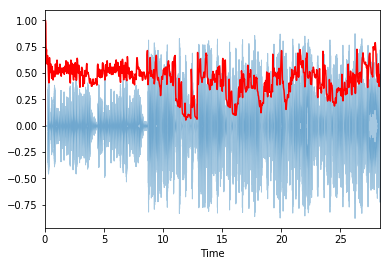

In [35]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

In [51]:
len(spectral_centroids)

1221

616


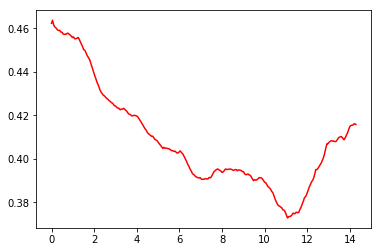

In [56]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

def plot_running_mean(N):
    y = running_mean(normalize(spectral_centroids),N)
    frames = range(len(y))
    t = librosa.frames_to_time(frames)
    plt.plot(t, running_mean(normalize(spectral_centroids),N), color='r')
    print(len(t))
plot_running_mean(606)

In [3]:
df = pd.read_csv("fma_metadata/raw_tracks.csv")
df.track_file[0]

'music/WFMU/AWOL/AWOL_-_A_Way_Of_Life/AWOL_-_03_-_Food.mp3'